In [1]:
import requests
import io
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
plt.rcParams['font.family'] = 'Arial Unicode MS'

/Users/hoover/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Webscrapping Example
"""
# 將json改為csv

url = 'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=20240124&type=ALLBUT0999&_=1649743235999'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/111.25 (KHTML, like Gecko) Chrome/99.0.2345.81 Safari/123.36'}
    # BUT0999&_=1649743235999 不會抓到Option的資料
res = requests.get(url,headers=headers)

# 去除指數價格
lines = [l for l in res.text.split('\n') if len(l.split(',"'))>=10]
# 將list轉為txt方便用csv讀取
df = pd.read_csv(io.StringIO(','.join(lines)))
# 將不必要的符號去除
df = df.applymap(lambda s:(str(s).replace('=','').replace(',','').replace('"',''))).set_index('證券代號')
# 將數字轉為數值型態
df = df.applymap(lambda s:pd.to_numeric(str(s),errors='coerce')).dropna(how='all',axis=1)
df
"""

'\n# 將json改為csv\n\nurl = \'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=20240124&type=ALLBUT0999&_=1649743235999\'\nheaders = {\'User-Agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/111.25 (KHTML, like Gecko) Chrome/99.0.2345.81 Safari/123.36\'}\n    # BUT0999&_=1649743235999 不會抓到Option的資料\nres = requests.get(url,headers=headers)\n\n# 去除指數價格\nlines = [l for l in res.text.split(\'\n\') if len(l.split(\',"\'))>=10]\n# 將list轉為txt方便用csv讀取\ndf = pd.read_csv(io.StringIO(\',\'.join(lines)))\n# 將不必要的符號去除\ndf = df.applymap(lambda s:(str(s).replace(\'=\',\'\').replace(\',\',\'\').replace(\'"\',\'\'))).set_index(\'證券代號\')\n# 將數字轉為數值型態\ndf = df.applymap(lambda s:pd.to_numeric(str(s),errors=\'coerce\')).dropna(how=\'all\',axis=1)\ndf\n'

In [3]:
# 讀取request response
"""
if res.status_code == 200:
    text_content = res.text
    print(text_content)
else:
    print(f"Error: {res.status_code}")
"""

'\nif res.status_code == 200:\n    text_content = res.text\n    print(text_content)\nelse:\n    print(f"Error: {res.status_code}")\n'

### Webscraping one day stock data

In [4]:
"""
datestr = '20240124'

# 下載股價
r = requests.get('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + datestr + '&type=ALLBUT0999&_=1649743235999')

# 整理資料，變成表格
df = pd.read_csv(io.StringIO(r.text.replace("=", "")), header=["證券代號" in l for l in r.text.split("\n")].index(True)-1).set_index('證券代號')
    # 把始資料證券代號前“=”去除

# 整理一些字串：
df = df.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", ""), errors='coerce')).dropna(how='all', axis=1)
    # 把第三欄以後的資料型態改成數值，刪掉不必要的欄

df
"""

'\ndatestr = \'20240124\'\n\n# 下載股價\nr = requests.get(\'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=\' + datestr + \'&type=ALLBUT0999&_=1649743235999\')\n\n# 整理資料，變成表格\ndf = pd.read_csv(io.StringIO(r.text.replace("=", "")), header=["證券代號" in l for l in r.text.split("\n")].index(True)-1).set_index(\'證券代號\')\n    # 把始資料證券代號前“=”去除\n\n# 整理一些字串：\ndf = df.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", ""), errors=\'coerce\')).dropna(how=\'all\', axis=1)\n    # 把第三欄以後的資料型態改成數值，刪掉不必要的欄\n\ndf\n'

### Webscrapping multiple days

In [5]:
def daily_price(date):
    datestr = str(date)
    # 下載股價
    r = requests.get('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + datestr + '&type=ALLBUT0999&_=1649743235999')

    # 整理資料，變成表格
    df = pd.read_csv(io.StringIO(r.text.replace("=", "")), header=["證券代號" in l for l in r.text.split("\n")].index(True)-1).set_index('證券代號')
        # 把始資料證券代號前“=”去除

    # 整理一些字串：
    df = df.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", ""), errors='coerce')).dropna(how='all', axis=1)
        # 把第三欄以後的資料型態改成數值，刪掉不必要的欄

    return df

In [6]:
start_date = '2023-01-01'
end_date = '2023-12-31'

dates = pd.date_range(start=start_date, end=end_date).tolist()
formatted_dates = [date.strftime('%Y%m%d') for date in dates]
print(formatted_dates)

['20230101', '20230102', '20230103', '20230104', '20230105', '20230106', '20230107', '20230108', '20230109', '20230110', '20230111', '20230112', '20230113', '20230114', '20230115', '20230116', '20230117', '20230118', '20230119', '20230120', '20230121', '20230122', '20230123', '20230124', '20230125', '20230126', '20230127', '20230128', '20230129', '20230130', '20230131', '20230201', '20230202', '20230203', '20230204', '20230205', '20230206', '20230207', '20230208', '20230209', '20230210', '20230211', '20230212', '20230213', '20230214', '20230215', '20230216', '20230217', '20230218', '20230219', '20230220', '20230221', '20230222', '20230223', '20230224', '20230225', '20230226', '20230227', '20230228', '20230301', '20230302', '20230303', '20230304', '20230305', '20230306', '20230307', '20230308', '20230309', '20230310', '20230311', '20230312', '20230313', '20230314', '20230315', '20230316', '20230317', '20230318', '20230319', '20230320', '20230321', '20230322', '20230323', '20230324', '20

In [7]:
data = {}
fail_dates = []
for i in tqdm(formatted_dates):
    fail_count = 0
    max_fail = 3
    try:
        df = daily_price(i)
        data[i] = df
    except:
        fail_dates.append(i)
        fail_count += 1
        if fail_count == max_fail:
            raise

    time.sleep(2.6)

  0%|          | 0/365 [00:00<?, ?it/s]

In [8]:
fail_dates

['20230101',
 '20230102',
 '20230107',
 '20230108',
 '20230114',
 '20230115',
 '20230118',
 '20230119',
 '20230120',
 '20230121',
 '20230122',
 '20230123',
 '20230124',
 '20230125',
 '20230126',
 '20230127',
 '20230128',
 '20230129',
 '20230204',
 '20230205',
 '20230211',
 '20230212',
 '20230218',
 '20230219',
 '20230225',
 '20230226',
 '20230227',
 '20230228',
 '20230304',
 '20230305',
 '20230311',
 '20230312',
 '20230318',
 '20230319',
 '20230325',
 '20230326',
 '20230401',
 '20230402',
 '20230403',
 '20230404',
 '20230405',
 '20230408',
 '20230409',
 '20230415',
 '20230416',
 '20230422',
 '20230423',
 '20230429',
 '20230430',
 '20230501',
 '20230506',
 '20230507',
 '20230513',
 '20230514',
 '20230520',
 '20230521',
 '20230527',
 '20230528',
 '20230603',
 '20230604',
 '20230610',
 '20230611',
 '20230617',
 '20230618',
 '20230622',
 '20230623',
 '20230624',
 '20230625',
 '20230701',
 '20230702',
 '20230708',
 '20230709',
 '20230715',
 '20230716',
 '20230722',
 '20230723',
 '20230729',

In [9]:
data

{'20230103':           成交股數   成交筆數        成交金額     開盤價     最高價     最低價     收盤價  漲跌價差  \
 證券代號                                                                      
 0050  15272877  13899  1673263794  109.60  110.90  108.45  110.75  0.55   
 0051     59406    148     3033756   51.25   51.50   50.80   51.40  0.15   
 0052    284445    403    26319413   92.00   93.50   91.40   93.30  0.80   
 0053      7014   1006      361840   51.70   52.35   51.40   52.35  0.95   
 0055     92843    307     1984374   21.46   21.52   21.23   21.49  0.01   
 ...        ...    ...         ...     ...     ...     ...     ...   ...   
 9944     73177     54     1487980   20.40   20.40   20.15   20.30  0.15   
 9945   5628497   4272   242191591   43.20   43.55   42.35   43.55  0.30   
 9946     10003     13      121606   12.20   12.20   12.15   12.15  0.05   
 9955    252042    246     5086427   19.90   20.50   19.85   20.40  0.60   
 9958   3192107   2311   289151931   89.50   91.70   88.80   90.90  2.30   


### Save data to csv or Excel

In [10]:
# Save multiple DataFrames to Excel in different sheets
with pd.ExcelWriter('TW_Stock_LTprice.xlsx') as writer:
    for sheet_name, df in tqdm(data.items()):
        df.to_excel(writer, sheet_name=sheet_name)

  0%|          | 0/239 [00:00<?, ?it/s]

#### Read data from csv (1 day data) or Excel(Multiple days data)

In [11]:
data_readexcel = pd.read_excel('/Users/hoover/Documents/Github/TW Stock/TW_Stock_LTprice.xlsx',index_col=0 ,sheet_name=None)
data = data_readexcel
data

{'20230103':           成交股數   成交筆數        成交金額     開盤價     最高價     最低價     收盤價  漲跌價差  \
 證券代號                                                                      
 0050  15272877  13899  1673263794  109.60  110.90  108.45  110.75  0.55   
 0051     59406    148     3033756   51.25   51.50   50.80   51.40  0.15   
 0052    284445    403    26319413   92.00   93.50   91.40   93.30  0.80   
 0053      7014   1006      361840   51.70   52.35   51.40   52.35  0.95   
 0055     92843    307     1984374   21.46   21.52   21.23   21.49  0.01   
 ...        ...    ...         ...     ...     ...     ...     ...   ...   
 9944     73177     54     1487980   20.40   20.40   20.15   20.30  0.15   
 9945   5628497   4272   242191591   43.20   43.55   42.35   43.55  0.30   
 9946     10003     13      121606   12.20   12.20   12.15   12.15  0.05   
 9955    252042    246     5086427   19.90   20.50   19.85   20.40  0.60   
 9958   3192107   2311   289151931   89.50   91.70   88.80   90.90  2.30   


### Time series for selected variables

In [12]:
close = pd.DataFrame({a:b['收盤價'] for a,b in data.items()}).transpose()
close.index = pd.to_datetime(close.index)
display(close.head(3), close.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,110.75,51.40,93.30,52.35,21.49,25.49,78.65,18.54,53.25,71.2,...,26.90,156.0,50.3,105.0,61.6,20.30,43.55,12.15,20.4,90.9
2023-01-04,110.50,51.70,92.90,52.30,21.61,25.45,78.60,18.60,53.45,71.3,...,27.25,160.0,50.8,105.0,61.6,20.35,43.35,12.25,21.0,91.7
2023-01-05,111.30,51.75,93.65,52.70,21.69,25.46,79.05,18.95,53.90,71.6,...,27.25,160.5,50.9,104.5,61.7,20.45,43.00,12.20,23.1,89.5


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,135.75,73.40,129.25,71.60,23.99,37.42,99.6,15.80,65.95,89.35,...,29.85,185.5,49.30,134.0,90.3,20.15,37.00,20.5,24.45,168.0
2023-12-28,135.75,73.50,129.40,72.00,24.13,37.33,99.6,16.06,66.00,89.30,...,29.95,185.0,49.35,134.5,90.8,20.15,37.85,20.2,24.50,173.5
2023-12-29,135.45,73.65,129.40,71.65,24.12,37.40,100.0,16.25,66.20,89.40,...,29.95,186.0,49.45,134.5,90.5,20.20,37.75,20.4,24.40,174.5


In [13]:
open = pd.DataFrame({a:b['開盤價'] for a,b in data.items()}).transpose()
open.index = pd.to_datetime(open.index)
display(open.head(3), open.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,109.60,51.25,92.00,51.7,21.46,25.28,78.6,18.42,52.60,70.7,...,26.9,156.0,50.4,105.5,61.8,20.4,43.2,12.20,19.9,89.5
2023-01-04,110.30,51.70,93.20,52.5,21.49,25.49,78.5,18.55,53.55,71.2,...,27.0,156.5,50.3,105.5,61.6,20.3,43.5,12.15,20.7,90.1
2023-01-05,111.25,51.70,93.85,52.7,21.70,25.55,79.4,18.70,53.90,71.8,...,27.2,160.0,50.9,106.0,61.6,20.3,43.7,12.25,21.5,91.1


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,134.40,73.1,128.10,71.4,23.89,37.14,99.55,15.83,65.75,89.0,...,29.90,184.0,49.40,135.0,90.3,20.25,36.80,20.45,24.75,173.0
2023-12-28,135.75,73.8,129.75,71.6,24.01,37.43,99.60,15.85,66.40,89.6,...,29.85,185.5,49.30,135.5,90.3,20.20,37.05,20.50,24.90,168.5
2023-12-29,135.70,73.5,128.70,71.8,24.10,37.33,100.05,16.15,66.25,89.3,...,29.90,184.5,49.45,135.0,90.7,20.15,38.10,20.15,24.70,173.5


In [14]:
n_share_traded = pd.DataFrame({a:b['成交股數'] for a,b in data.items()}).transpose()
n_share_traded.index = pd.to_datetime(n_share_traded.index)
display(n_share_traded.head(3), n_share_traded.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,15272877.0,59406.0,284445.0,7014.0,92843.0,14697328.0,22999.0,135943.0,4673.0,35658.0,...,110773.0,392076.0,17321.0,197534.0,13091.0,73177.0,5628497.0,10003.0,252042.0,3192107.0
2023-01-04,14211742.0,15921.0,301918.0,16970.0,74895.0,11096326.0,3897.0,160160.0,5767.0,23602.0,...,113224.0,1063222.0,44009.0,198909.0,7171.0,45956.0,2229227.0,17231.0,620313.0,4037850.0
2023-01-05,12395862.0,12403.0,268634.0,2342.0,281929.0,11847142.0,3872.0,349304.0,4178.0,26252.0,...,217972.0,1158749.0,25300.0,224301.0,11797.0,43762.0,3514499.0,7272.0,3267447.0,3679689.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,30857192.0,48880.0,199902.0,16316.0,319874.0,53652287.0,5165.0,321835.0,11526.0,11763.0,...,147935.0,284785.0,145491.0,91034.0,100137.0,127735.0,4761381.0,289364.0,260892.0,3799729.0
2023-12-28,15353146.0,45615.0,133199.0,16171.0,460817.0,30018610.0,1029.0,316021.0,9327.0,21139.0,...,139155.0,371745.0,106674.0,135471.0,118987.0,99436.0,9746258.0,310468.0,820850.0,2868980.0
2023-12-29,13407035.0,25615.0,479675.0,4318.0,378574.0,21509629.0,16001.0,476753.0,3665.0,106837.0,...,149136.0,413926.0,85014.0,103150.0,79095.0,107549.0,7692765.0,176427.0,252136.0,2726813.0


In [15]:
n_transaction = pd.DataFrame({a:b['成交筆數'] for a,b in data.items()}).transpose()
n_transaction.index = pd.to_datetime(n_transaction.index)
display(n_transaction.head(3), n_transaction.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,13899.0,148.0,403.0,1006.0,307.0,11364.0,1001.0,953.0,910.0,980.0,...,139.0,709.0,13.0,262.0,34.0,54.0,4272.0,13.0,246.0,2311.0
2023-01-04,11908.0,106.0,361.0,905.0,222.0,8143.0,900.0,523.0,231.0,816.0,...,105.0,1098.0,14.0,174.0,28.0,39.0,2737.0,13.0,392.0,3372.0
2023-01-05,10075.0,137.0,358.0,1008.0,299.0,9142.0,864.0,953.0,897.0,996.0,...,186.0,1594.0,14.0,222.0,34.0,49.0,2707.0,8.0,1600.0,3634.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,16671.0,181.0,630.0,859.0,326.0,25478.0,972.0,953.0,679.0,679.0,...,179.0,911.0,47.0,144.0,136.0,164.0,2598.0,164.0,233.0,3684.0
2023-12-28,9803.0,194.0,279.0,1022.0,460.0,19276.0,3.0,742.0,11.0,25.0,...,126.0,1206.0,22.0,144.0,185.0,127.0,5175.0,242.0,738.0,2131.0
2023-12-29,7710.0,164.0,326.0,1012.0,307.0,13703.0,6.0,796.0,11.0,895.0,...,101.0,910.0,10.0,168.0,130.0,161.0,5231.0,100.0,202.0,2559.0


In [16]:
turnover = pd.DataFrame({a:b['成交金額'] for a,b in data.items()}).transpose()
turnover.index = pd.to_datetime(turnover.index)
display(turnover.head(3), turnover.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,1.673264e+09,3033756.0,26319413.0,361840.0,1984374.0,372787005.0,1800503.0,2516354.0,247323.0,2537288.0,...,2972017.0,60852841.0,873378.0,20736612.0,807605.0,1487980.0,242191591.0,121606.0,5086427.0,289151931.0
2023-01-04,1.569704e+09,822051.0,28125497.0,890265.0,1612403.0,282618723.0,305966.0,2982526.0,307741.0,1680089.0,...,3073544.0,168134335.0,2235165.0,21009169.0,441730.0,933732.0,96866885.0,209628.0,12935456.0,371395023.0
2023-01-05,1.379135e+09,642989.0,25138909.0,122693.0,6115765.0,302252011.0,305877.0,6598923.0,224520.0,1879465.0,...,5947962.0,185831017.0,1287567.0,23545692.0,726104.0,890195.0,152234789.0,88795.0,73984221.0,331294702.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,4.177190e+09,3584247.0,25720711.0,1165865.0,7669292.0,2.002837e+09,513494.0,5090128.0,758557.0,1047433.0,...,4420960.0,52684083.0,7173919.0,12234890.0,9058557.0,2581484.0,175945631.0,5927786.0,6420030.0,641620698.0
2023-12-28,2.085248e+09,3362771.0,17226858.0,1162970.0,11099781.0,1.123242e+09,102468.0,5044585.0,616117.0,1889875.0,...,4158540.0,68651610.0,5259310.0,18165258.0,10735657.0,2007785.0,365800955.0,6301889.0,20440366.0,492788101.0
2023-12-29,1.819068e+09,1886622.0,61891353.0,308954.0,9135053.0,8.036874e+08,1600299.0,7743501.0,242282.0,9539554.0,...,4459153.0,76742851.0,4191742.0,13815183.0,7181366.0,2166550.0,291570922.0,3584893.0,6182199.0,474739197.0


In [17]:
high = pd.DataFrame({a:b['最高價'] for a,b in data.items()}).transpose()
high.index = pd.to_datetime(high.index)
display(high.head(3), high.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,110.9,51.50,93.50,52.35,21.52,25.50,78.65,18.65,53.50,71.2,...,27.00,156.5,50.5,106.0,61.8,20.4,43.55,12.20,20.50,91.7
2023-01-04,110.8,51.75,93.50,52.70,21.62,25.55,78.90,18.66,53.55,71.4,...,27.25,160.5,50.9,106.5,61.6,20.4,43.70,12.25,21.15,92.8
2023-01-05,111.7,51.80,94.15,52.70,21.73,25.60,79.40,19.00,53.90,71.8,...,27.40,161.5,50.9,106.0,61.7,20.5,43.75,12.25,23.10,91.3


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,135.9,73.45,129.25,71.70,24.01,37.42,99.60,15.87,65.95,89.35,...,29.95,185.5,49.40,135.0,91.1,20.3,37.05,20.65,24.85,173.0
2023-12-28,136.0,73.95,129.75,72.15,24.14,37.54,99.60,16.08,66.40,89.60,...,29.95,186.0,49.40,135.5,90.8,20.3,37.85,20.50,25.30,173.5
2023-12-29,136.0,73.75,129.40,71.80,24.18,37.47,100.05,16.30,66.25,89.40,...,30.00,186.5,49.45,135.0,91.0,20.2,38.40,20.50,24.70,175.5


In [18]:
low = pd.DataFrame({a:b['最低價'] for a,b in data.items()}).transpose()
low.index = pd.to_datetime(low.index)
display(low.head(3), low.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,108.45,50.80,91.40,51.4,21.23,25.19,78.30,18.40,52.6,70.7,...,26.7,154.0,50.3,103.0,61.6,20.15,42.35,12.15,19.85,88.8
2023-01-04,110.10,51.40,92.85,52.3,21.44,25.41,78.50,18.55,53.3,71.2,...,27.0,155.0,50.3,105.0,61.6,20.30,43.30,12.15,20.45,90.1
2023-01-05,110.95,51.65,93.30,52.7,21.62,25.43,79.05,18.70,53.9,71.6,...,27.2,159.0,50.9,104.0,61.5,20.30,43.00,12.20,21.05,89.2


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,134.35,73.1,128.1,71.30,23.89,37.14,99.55,15.77,65.75,89.0,...,29.8,184.0,49.3,134.0,90.0,20.15,36.80,20.40,24.45,167.0
2023-12-28,135.45,73.5,128.8,71.60,24.00,37.27,99.60,15.80,66.00,89.2,...,29.8,184.0,49.3,133.5,90.0,20.15,36.80,20.10,24.50,168.5
2023-12-29,135.35,73.4,128.7,71.65,24.09,37.25,99.80,16.15,66.00,89.3,...,29.8,184.0,49.3,133.5,90.5,20.05,37.55,20.15,24.40,172.0


In [19]:
PE_ratio = pd.DataFrame({a:b['本益比'] for a,b in data.items()}).transpose()
PE_ratio.index = pd.to_datetime(PE_ratio.index)
display(PE_ratio.head(3), PE_ratio.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.90,15.85,0.0,15.04,15.10,4.17,5.73,23.37,0.0,30.40
2023-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.06,16.26,0.0,15.04,15.10,4.18,5.70,23.56,0.0,30.67
2023-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.06,16.31,0.0,14.97,15.12,4.20,5.66,23.46,0.0,29.93


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.88,18.28,0.0,11.59,14.07,6.03,17.79,120.59,0.0,87.96
2023-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.93,18.23,0.0,11.63,14.14,6.03,18.20,118.82,0.0,90.84
2023-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.93,18.33,0.0,11.63,14.10,6.05,18.15,120.00,0.0,91.36


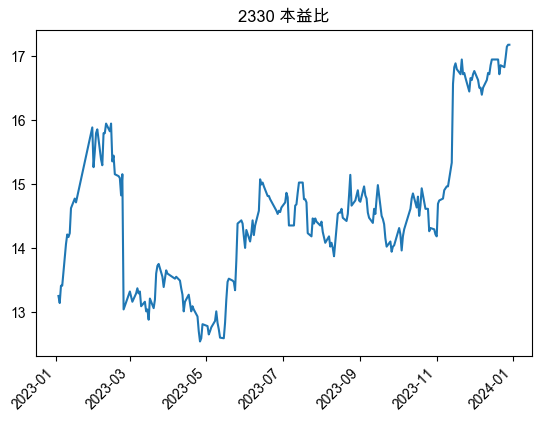

In [20]:
PE_ratio['2330'].plot()
plt.title("2330 本益比")
plt.xticks(rotation=45)
plt.show()

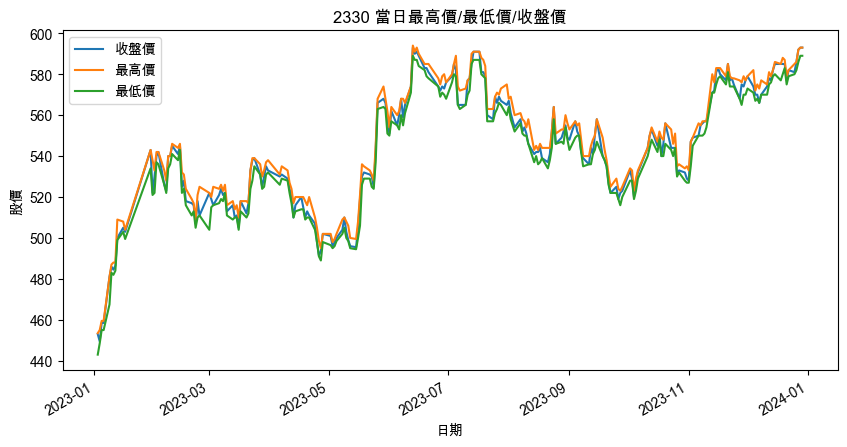

In [21]:
close['2330'].plot(figsize=(10,5))
high['2330'].plot()
low['2330'].plot()
plt.title("2330 當日最高價/最低價/收盤價")
plt.legend(['收盤價','最高價','最低價'])
plt.xlabel('日期')
plt.ylabel('股價')
plt.xticks()
plt.show()

### 個股逐日價格走勢圖

In [22]:
from matplotlib.ticker import AutoMinorLocator

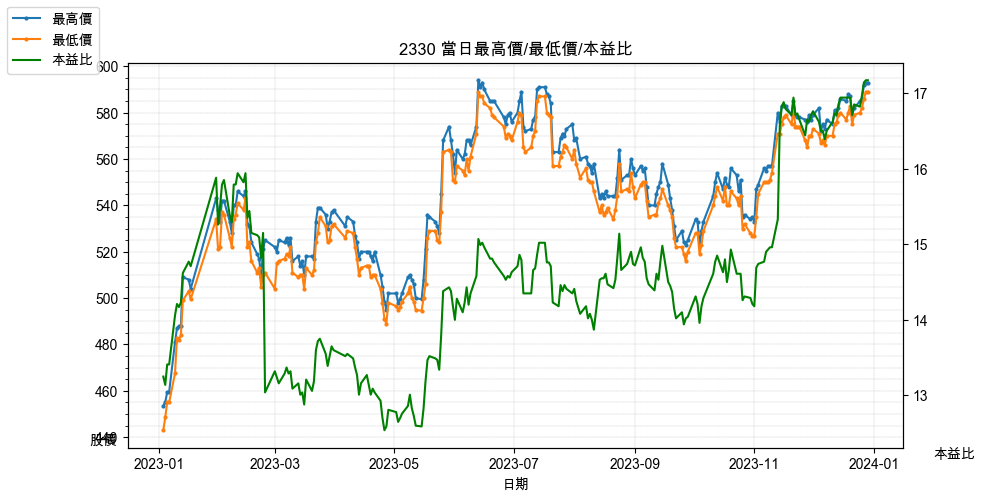

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(high['2330'], marker='o', markersize=2)
ax.plot(low['2330'], marker='o', markersize=2)
ax.set_xlabel('日期')
ax.set_ylabel('股價', rotation=0, loc='bottom')
ax.set_title('2330 當日最高價/最低價/本益比')

ax2 = ax.twinx() 
ax2.plot(PE_ratio['2330'], color='green')   # PE_ratio is same as close
ax2.set_ylabel("本益比", rotation=0, loc='bottom')

fig.legend(['最高價','最低價',"本益比"], loc=2)

"""
def custom_date_format(date):
    last_month = None
    last_year = None
    date_list = []
    for i in date.index:
        date_obj = pd.to_datetime(i)

        # Check if it's the first day of the year
        if last_year != date_obj.year:
            #print(f"Year: {date_obj.year}, Month: {date_obj.strftime('%b')}, Day: {date_obj.day}")
            date_list.append([date_obj.year, date_obj.strftime('%b'), date_obj.day])

        # Check if it's the first day of the month
        elif last_month != date_obj.month:
            #print(f"Month: {date_obj.strftime('%b')}, Day: {date_obj.day}")
            date_list.append([date_obj.strftime('%b'), date_obj.day])

        # For other dates, return the day
        else:
            #print(f"Day: {date_obj.day}")
            date_list.append(date_obj.day)

        last_year = date_obj.year
        last_month = date_obj.month
    
    return  date_list
"""

#ax.set_xticks(high.index, [i for i in custom_date_format(high['2330'])], rotation=90)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', linestyle='--', linewidth=0.25)

"""
# Function to format tick labels based on date
def custom_date_format(date):
    day = date.strftime('%d')
    month = date.strftime('%b')
    year = date.strftime('%Y')
    
    if date.day == 1 and date.month == 1:
        return f'{day}\n{month}\n{year}'
    elif date.day == 1:
        return f'{day}\n{month}'
    else:
        return f'{day}'
    
ax.set_xticks(high.index, [custom_date_format(date) for date in high.index])
"""
# use datetime to reference the dates
plt.show()

### 個股逐日交易量

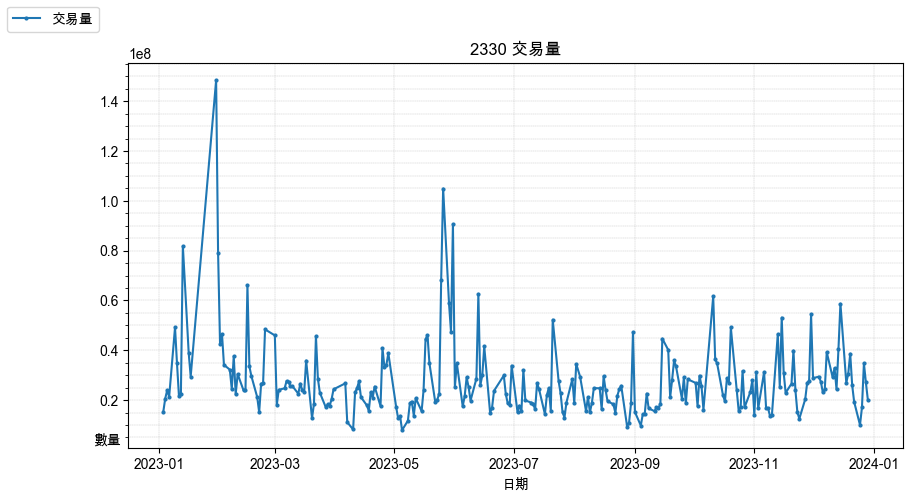

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(n_share_traded['2330'] , marker='o', markersize=2)
ax.set_xlabel('日期')
ax.set_ylabel('數量', rotation=0, loc='bottom')
ax.set_title('2330 交易量')
fig.legend(['交易量'], loc=2);

"""
def custom_date_format(date):
    last_month = None
    last_year = None
    date_list = []
    for i in date.index:
        date_obj = pd.to_datetime(i)

        # Check if it's the first day of the year
        if last_year != date_obj.year:
            #print(f"Year: {date_obj.year}, Month: {date_obj.strftime('%b')}, Day: {date_obj.day}")
            date_list.append([date_obj.year, date_obj.strftime('%b'), date_obj.day])

        # Check if it's the first day of the month
        elif last_month != date_obj.month:
            #print(f"Month: {date_obj.strftime('%b')}, Day: {date_obj.day}")
            date_list.append([date_obj.strftime('%b'), date_obj.day])

        # For other dates, return the day
        else:
            #print(f"Day: {date_obj.day}")
            date_list.append(date_obj.day)

        last_year = date_obj.year
        last_month = date_obj.month
    
    return  date_list
"""

#ax.set_xticks(high.index, [i for i in custom_date_format(high['2330'])], rotation=90)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', linestyle='--', linewidth=0.25)

plt.show()

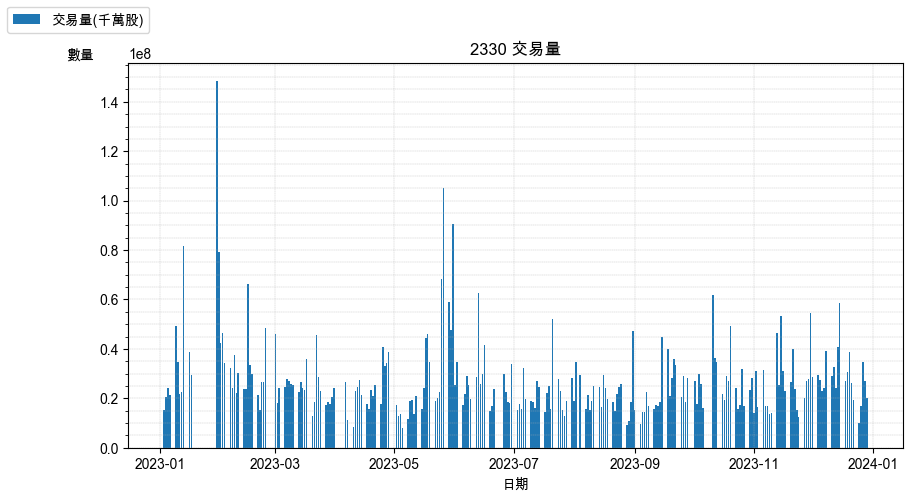

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(n_share_traded['2330'].index, n_share_traded['2330'].values)
ax.set_xlabel('日期')
ax.set_ylabel('數量', rotation=0, loc='top')
ax.set_title('2330 交易量')
fig.legend(['交易量(千萬股)'], loc=2);

"""
def custom_date_format(date):
    last_month = None
    last_year = None
    date_list = []
    for i in date.index:
        date_obj = pd.to_datetime(i)

        # Check if it's the first day of the year
        if last_year != date_obj.year:
            #print(f"Year: {date_obj.year}, Month: {date_obj.strftime('%b')}, Day: {date_obj.day}")
            date_list.append([date_obj.year, date_obj.strftime('%b'), date_obj.day])

        # Check if it's the first day of the month
        elif last_month != date_obj.month:
            #print(f"Month: {date_obj.strftime('%b')}, Day: {date_obj.day}")
            date_list.append([date_obj.strftime('%b'), date_obj.day])

        # For other dates, return the day
        else:
            #print(f"Day: {date_obj.day}")
            date_list.append(date_obj.day)

        last_year = date_obj.year
        last_month = date_obj.month
    
    return  date_list
"""

#ax.set_xticks(high.index, [i for i in custom_date_format(high['2330'])], rotation=90)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', linestyle='--', linewidth=0.25)


plt.show()